# 調理手順


## TensorFlowのインストール

In [0]:
!pip install tensorflow

## TensorFlowのバージョンの確認


In [0]:
import tensorflow as tf
print(tf.__version__)

1.13.1


## Kerasのインストール

In [0]:
!pip install keras

In [0]:
import keras
print(keras.__version__)

2.2.4


Using TensorFlow backend.


## 設定

In [0]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 10

IMG_ROWS, IMG_COLS = 28, 28

グラフ描画用

In [0]:
handwritten_number_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## MNISTデータセットのローディング



In [0]:
from keras.datasets import mnist
#
(train_data, train_teacher_labels), (test_data, test_teacher_labels) = mnist.load_data()
print('ロードしたあと学習データ　train_data shape:', train_data.shape)
print('ロードしたあと検証データ　test_data shape:', test_data.shape)

11493376/11490434 [==============================] - 1s 0us/step
ロードしたあと学習データ　train_data shape: (60000, 28, 28)
ロードしたあと検証データ　test_data shape: (10000, 28, 28)


In [0]:
#データの中身を確認したいときは、下の行をコメントアウトして実行してみてください。
# print(train_data)

In [0]:
#データの中身を確認したいときは、下の行をコメントアウトして実行してみてください。
# print(train_teacher_labels)

In [0]:
#データの中身を確認したいときは、下の行をコメントアウトして実行してみてください。
# rint(test_data)

In [0]:
#データの中身を確認したいときは、下の行をコメントアウトして実行してみてください。
# print(test_teacher_labels)

## 学習モデルに合わせてデータ配列の形状変換

In [0]:
from keras import backend as Keras

In [0]:
print('Channel調整変換前　train_data shape:', train_data.shape)
print('Channel調整変換前　test_data shape:', test_data.shape)
#
if Keras.image_data_format() == 'channels_first':
  train_data = train_data.reshape(train_data.shape[0], 1, IMG_ROWS, IMG_COLS)
  test_data = test_data.reshape(test_data.shape[0], 1, IMG_ROWS, IMG_COLS)
  input_shape = (1, IMG_ROWS, IMG_COLS)
else:
  train_data = train_data.reshape(train_data.shape[0], IMG_ROWS, IMG_COLS, 1)
  test_data = test_data.reshape(test_data.shape[0], IMG_ROWS, IMG_COLS, 1)
  input_shape = (IMG_ROWS, IMG_COLS, 1)

print('Channel調整変換後　train_data shape:', train_data.shape)
print('Channel調整変換後　test_data shape:', test_data.shape)

Channel調整変換前　train_data shape: (60000, 28, 28)
Channel調整変換前　test_data shape: (10000, 28, 28)
Channel調整変換後　train_data shape: (60000, 28, 28, 1)
Channel調整変換後　test_data shape: (10000, 28, 28, 1)


## 学習モデルに合わせてデータ調整

In [0]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [0]:
print(test_data)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

[0-255]の値を[0.0-1.0]に変換

In [0]:
train_data /= 255
test_data /= 255

In [0]:
print('学習データ　train_data shape:', train_data.shape)
print(train_data.shape[0], 'サンプルを学習します')
print('検証データ　test_data shape:', test_data.shape)
print(test_data.shape[0], 'サンプルを検証します')

学習データ　train_data shape: (60000, 28, 28, 1)
60000 サンプルを学習します
検証データ　test_data shape: (10000, 28, 28, 1)
10000 サンプルを検証します


## 教師ラベルデータの変換

In [0]:
# 学習用教師ラベルデータをOne-hotベクトルに変換します
print('Keras変換前学習用教師ラベルデータ　train_teacher_labels shape:', train_teacher_labels.shape)
train_teacher_labels= keras.utils.to_categorical(train_teacher_labels, NUM_CLASSES)
print('Keras変換後学習用教師ラベルデータ　train_teacher_labels shape:',train_teacher_labels.shape)

# 検証用教師ラベルデータをOne-hotベクトルに変換します
print('Keras変換前検証用教師ラベルデータ　test_teacher_labels shape:', test_teacher_labels.shape)
print(test_teacher_labels)
test_teacher_labels = keras.utils.to_categorical(test_teacher_labels, NUM_CLASSES)
print('Keras変換後検証用教師ラベルデータ　test_teacher_labels shape:',test_teacher_labels.shape)
print(test_teacher_labels)

Keras変換前学習用教師ラベルデータ　train_teacher_labels shape: (60000,)
Keras変換後学習用教師ラベルデータ　train_teacher_labels shape: (60000, 10)
Keras変換前検証用教師ラベルデータ　test_teacher_labels shape: (10000,)
[7 2 1 ... 4 5 6]
Keras変換後検証用教師ラベルデータ　test_teacher_labels shape: (10000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## シーケンシャルモデル指定

In [0]:
from keras.models import Sequential
model = Sequential()

## 学習モデルの構築

In [0]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

## ニューラルネットワークの構築

In [0]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## モデルのコンパイル
 

In [0]:
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

## 学習


In [0]:
print('学習させる前　train_data shape:', train_data.shape)
print('学習させる前　test_data shape:', test_data.shape)

学習させる前　train_data shape: (60000, 28, 28, 1)
学習させる前　test_data shape: (10000, 28, 28, 1)


学習のグラフを描画する関数

In [0]:
def plot_loss_accuracy_graph(fit_record):
  # 青い線で誤差の履歴をプロットします、検証時誤差は黒い線で
  plt.plot(fit_record.history['loss'], "-D", color="blue", label="train_loss", linewidth=2)
  plt.plot(fit_record.history['val_loss'], "-D", color="black", label="val_loss", linewidth=2)
  plt.title('LOSS')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.show()
  
  # 緑の線で精度の履歴をプロットします、検証時制度は黒い線で
  plt.plot(fit_record.history['acc'],"-o", color="green", label="train_accuracy", linewidth=2)
  plt.plot(fit_record.history['val_acc'],"-o",color="black", label="val_accuracy", linewidth=2)
  plt.title('ACCURACY')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc="lower right")
  plt.show()

In [0]:
print('反復学習回数：', EPOCHS)
fit_record=model.fit(train_data, train_teacher_labels,
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  verbose=1,
                  validation_data=(test_data, test_teacher_labels))

反復学習回数： 10
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2670 - acc: 0.9177 - val_loss: 0.0587 - val_acc: 0.9813
Epoch 2/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0904 - acc: 0.9732 - val_loss: 0.0409 - val_acc: 0.9861
Epoch 3/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0670 - acc: 0.9805 - val_loss: 0.0338 - val_acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0568 - acc: 0.9829 - val_loss: 0.0317 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 5s 75us/step - loss: 0.0483 - acc: 0.9853 - val_loss: 0.0290 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.0419 - acc: 0.9878 - val_loss: 0.0300 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 5s 77us/s

## 学習プロセスのグラフ

In [0]:
import matplotlib.pyplot as plt

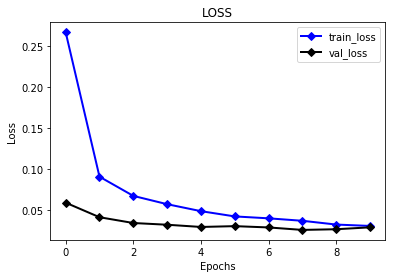

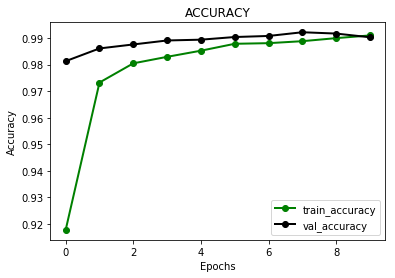

In [0]:
plot_loss_accuracy_graph(fit_record)

## 検証

In [0]:
result_score = model.evaluate(test_data, test_teacher_labels, verbose=0)

検証結果出力

In [0]:
print('検証誤差:', result_score[0])
print('検証正解率:', result_score[1])

検証誤差: 0.02856066571630072
検証正解率: 0.9903


## 予測

In [0]:
prediction_array = model.predict(test_data)

In [0]:
import numpy as np

In [0]:
def plot_image(data_location, predictions_array, real_teacher_labels, dataset):
  predictions_array, real_teacher_labels, img = predictions_array[data_location], real_teacher_labels[data_location], dataset[data_location]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array)
  # 文字の色：予測結果と実際のラベルと一致する場合は緑、一致しない場合、赤にします
  if predicted_label == real_teacher_labels:
    color = 'green'
  else:
    color = 'red'
  # np.maxはnumpyの関数で、指定した配列の中、最大値を取り出します、ここでは、predictions_arrayの最大値を返します
  plt.xlabel("{} {:2.0f}% ({})".format(handwritten_number_names[predicted_label],
                                100*np.max(predictions_array),
                                handwritten_number_names[real_teacher_labels]),
                                color=color)

In [0]:
def plot_teacher_labels_graph(data_location, predictions_array, real_teacher_labels):
  predictions_array, real_teacher_labels = predictions_array[data_location], real_teacher_labels[data_location]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#666666")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[real_teacher_labels].set_color('green')

one-hot vectorを整数の配列に変換する関数

In [0]:
def convertOneHotVector2Integers(one_hot_vector):
  return [np.where(r==1)[0][0] for r in one_hot_vector]

In [0]:
print(test_teacher_labels)
print(convertOneHotVector2Integers(test_teacher_labels))

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 

In [0]:
test_data.shape

(10000, 28, 28, 1)

In [0]:
test_data.shape[0]

10000

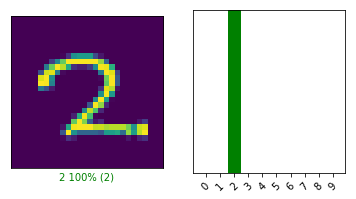

In [0]:
# 描画のために検証データを変換しておきます
test_data = test_data.reshape(test_data.shape[0], IMG_ROWS, IMG_COLS)

data_location = 77
plt.figure(figsize=(6,3))
#
plt.subplot(1,2,1)
plot_image(data_location, prediction_array,convertOneHotVector2Integers(test_teacher_labels), test_data)
#
plt.subplot(1,2,2)
plot_teacher_labels_graph(data_location, prediction_array, convertOneHotVector2Integers(test_teacher_labels))
_ = plt.xticks(range(10), handwritten_number_names, rotation=45)

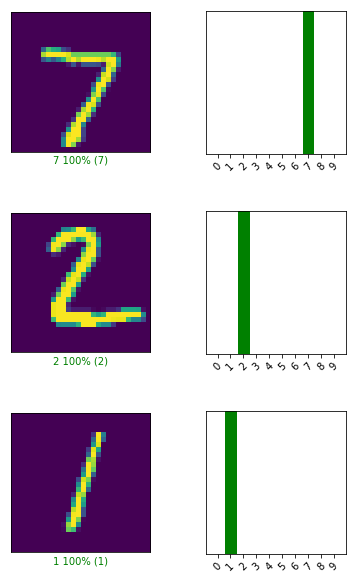

In [0]:
NUM_ROWS = 3
NUM_COLS = 1
NUM_IMAGES = NUM_ROWS*NUM_COLS
#
plt.figure(figsize=(2*2*NUM_COLS+2, 2*NUM_ROWS+4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(NUM_IMAGES):
  #
  plt.subplot(NUM_ROWS, 2*NUM_COLS, 2*i+1)
  plot_image(i, prediction_array,convertOneHotVector2Integers(test_teacher_labels), test_data)
  #
  plt.subplot(NUM_ROWS, 2*NUM_COLS, 2*i+2)
  plot_teacher_labels_graph(i, prediction_array, convertOneHotVector2Integers(test_teacher_labels))
  _ = plt.xticks(range(10), handwritten_number_names, rotation=45)

In [0]:
# 検証データから画像を表示します
img = test_data[data_location]
print(img.shape)

(28, 28)


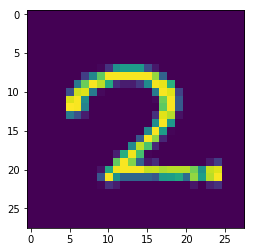

In [0]:
plt.imshow(img)

In [0]:
img = (np.expand_dims(img,0))
img =img.reshape(1, IMG_ROWS, IMG_COLS, 1)
print(img.shape)

(1, 28, 28, 1)


In [0]:
predictions_result_array = model.predict(img)

print(predictions_result_array)

[[8.1512394e-07 1.3321414e-07 9.9999857e-01 4.1682932e-10 6.4707566e-11
  1.9921773e-12 1.8326309e-09 3.8905546e-07 6.6390911e-08 3.6217953e-09]]


In [0]:
number=np.argmax(predictions_result_array[0])
print('予測結果：',handwritten_number_names[number])

予測結果： 2


## 学習済モデル保存

In [0]:
model.save('keras-mnist-model.h5')

保存後ファイルの確認

In [0]:
ls

keras-mnist-model.h5  sample_data/


## 学習済モデルのダウンロード

学習済ファイルのダウンロードは、前のレシピを参照してください。ここで省略します。